<a href="https://colab.research.google.com/github/soumyasasmal09/Satellite-Data-Analysis/blob/main/SatDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install earthengine-api
!pip install geemap
!pip install osmnx
!pip install pyproj

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 2.5 MB/s eta 0:00:00


In [ ]:
from PIL import Image
import os
import ee
import geemap
import numpy as np
import osmnx as ox
import json
import pandas as pd
from shapely.geometry import Point, Polygon
import random
from PIL import ImageDraw
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler

In [ ]:
ee.Authenticate()
ee.Initialize(project = "greenerydetection")

In [ ]:
def grids():
  center_longitude = 87.00944792154306  # Replace with your desired longitude
  center_latitude =  22.446997157073753  # Replace with your desired latitude
  rect_width = .015625*2.5  # Width of the rectangle in degrees
  rect_height = .015625*2.5 # Height of the rectangle in degrees

# Rectangle bounds
  west = center_longitude - (rect_width / 2)
  east = center_longitude + (rect_width / 2)
  south = center_latitude - (rect_height / 2)
  north = center_latitude + (rect_height / 2)

# Selecting a geometry object for the rectangle
  selectedArea = ee.Geometry.Rectangle([west, south, east, north])

  min_lon = west
  max_lon = east
  min_lat = south
  max_lat = north

  return selectedArea,west, east, south, north

In [ ]:
L  = 0.5
start_date_2023 = "2018-01-01"
end_date_2023 = "2024-11-30"

selectedArea, min_lon, max_lon, min_lat, max_lat = grids()

In [ ]:
new_image_collection = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")\
.filterBounds(selectedArea)\
.filterDate(start_date_2023,end_date_2023)\
.filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',1))\
.select(["B4",'B3','B2','B8','B11','B12'])


#COPERNICUS/S2_SR has been depereciated. Here copernicus satellite is used. LANDSAT can also be used. Check documentation for more data

In [ ]:
image_count = new_image_collection.size().getInfo()
print(image_count)



198


In [ ]:
from PIL import Image


## This functions  saves the images in the runtime enviornment. It can be saved in other location also

def save_RGB_image(imageArray):
  file_name ="D&T"+str(dtInfo)+"L"+"RGB_"+".jpeg"
  #image = Image.fromarray(imageArray , "RGB")
  imageArray.save(file_name , "JPEG" )
  print(str(file_name) + " SAVED SUCCESSFULLY")
  return 1


def save_NDVI_image(imageArray):
  file_name ="D&T"+str(dtInfo)+"L"+"NDVI"+".jpeg"
  image = Image.fromarray(imageArray.astype(np.uint8))
  image.save(file_name , "JPEG")
  print(str(file_name) + " SAVED SUCCESSFULLY")
  return 1


def save_NDWI_image(imageArray):
  file_name = "D&T" + str(dtInfo) + "L" + "NDWI" + ".jpeg"
  image = Image.fromarray(imageArray.astype(np.uint8))
  image.save(file_name, "JPEG")
  print(str(file_name) + " SAVED SUCCESSFULLY")
  return 1


In [ ]:
def band_normalization_255(band_data):
  print(band_data)
  min_value = np.min(band_data)
  max_value = np.max(band_data)
  normalized_data = (band_data - min_value) / (max_value - min_value) * 255
  print(normalized_data)
  return normalized_data.astype(np.uint8)

In [ ]:
def RGBimageVisualizer():
     RGB_band_B2 = (band_B2 - np.min(band_B2)) / (np.max(band_B2) - np.min(band_B2))*255
     RGB_band_B3 = (band_B3 - np.min(band_B3)) / (np.max(band_B3) -np.min(band_B3))*255
     RGB_band_B4 = (band_B4 - np.min(band_B4)) / (np.max(band_B4) - np.min(band_B4))*255
     rgb_image = np.dstack((RGB_band_B4, RGB_band_B3, RGB_band_B2))
     print(f"RGB image shape: {rgb_image.shape}")
     npImage  = Image.fromarray(rgb_image.astype(np.uint8))
     return npImage

In [ ]:
def imageStats():
  min_value = image.reduceRegion(
    reducer=ee.Reducer.min(),
    geometry=selectedArea,
    scale=10).getInfo()

  max_value = image.reduceRegion(
    reducer=ee.Reducer.max(),
    geometry=selectedArea,
    scale=10).getInfo()

  print('Min value:', min_value)

  print('Max value:', max_value)
  return min_value , max_value


def normalize(inputArray):
  min_value = np.min(inputArray)
  max_value = np.max(inputArray)
  normalized_array = (inputArray - min_value) / (max_value - min_value) * 255
  return normalized_array

In [ ]:

Cmap = geemap.Map()
Cmap.centerObject(selectedArea, zoom=18)

17.43703082327274
0 Layer added
[[2062 2164 2544 ... 2518 2474 2232]
 [2244 2314 2832 ... 2338 2408 2596]
 [2310 2254 3184 ... 1880 2098 2406]
 ...
 [2310 2148 2088 ... 2334 2412 2558]
 [2148 2080 2350 ... 2268 2408 2464]
 [2096 2114 2318 ... 2414 2592 2576]]
(433, 403, 6)
[0 1]
RGB image shape: (433, 403, 3)


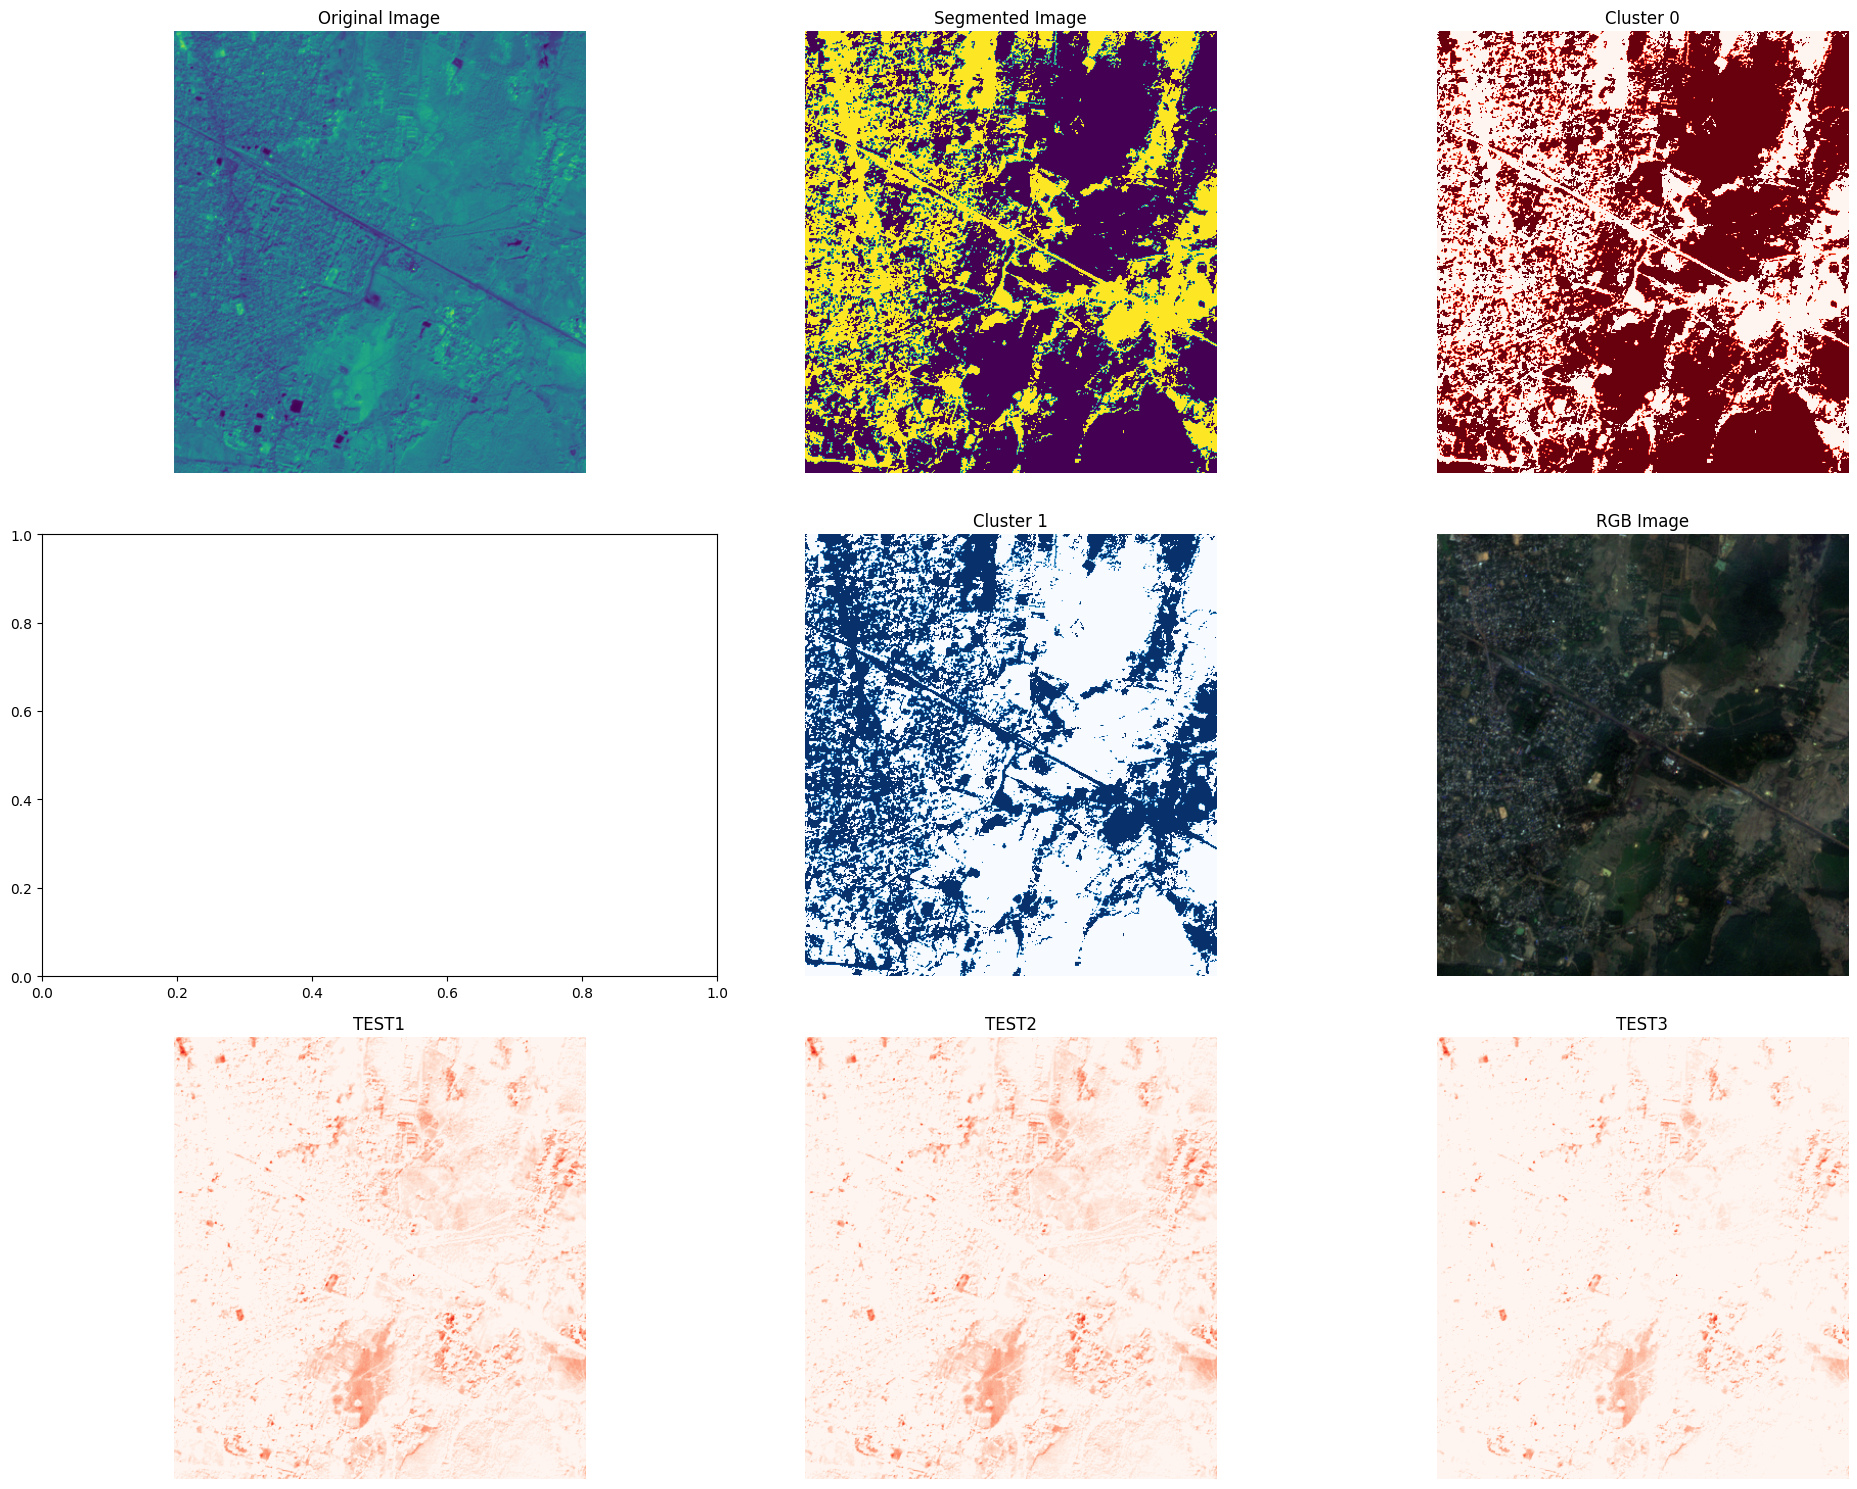

In [ ]:
image_list = new_image_collection.toList(new_image_collection.size())

stopLayerLimit = 1# new_image_collection.size().getInfo()# if needeed all layers

for i in range(stopLayerLimit):

    image = ee.Image(image_list.get(i))

    dtInfo = image.date().format().getInfo()
    print(selectedArea.area().getInfo()/10**6)
    clipped_image  = image.clip(selectedArea)#.unmask(0)

    min_max = clipped_image.reduceRegion( reducer=ee.Reducer.minMax(), geometry=selectedArea, scale=10, maxPixels=1e13 ).getInfo()

    vis_params_RGB_C = { 'bands': ['B4', 'B3', 'B2'], 'min': min(min_max['B4_min'], min_max['B3_min'], min_max['B2_min']), 'max': max(min_max['B4_max'], min_max['B3_max'], min_max['B2_max'])
    }
    Cmap.addLayer(clipped_image, vis_params_RGB_C, str(i))
    print(str(i) + " Layer added")

    band_data = clipped_image.sampleRectangle(region=selectedArea , defaultValue= 0 ).getInfo()
    band_B2 = np.array(band_data['properties']['B2'])
    band_B3 = np.array(band_data['properties']['B3'])
    band_B4 = np.array(band_data['properties']['B4'])
    band_B8 = np.array(band_data['properties']['B8'])
    band_B11 = np.array(band_data['properties']['B11'])
    band_B12 = np.array(band_data['properties']['B12'])

    print(band_B8)

    ndvi = (band_B8 - band_B4) / (band_B8 + band_B4)
    ndvi = np.nan_to_num(ndvi, nan=0.0)
    #ndwi = (band_B3 - band_B8) / (band_B3 + band_B8
    ndwi = (band_B3 - band_B8) / (band_B3 + band_B8)
    ndwi = np.nan_to_num(ndwi, nan=0.0)
    #ndbi = (band_B11 - band_B8) / (band_B11 + band_B8)
    #ndbi = np.nan_to_num(ndbi, nan=0.0)
    savi = (band_B8 - band_B4) / (band_B8 + band_B4 + L) * (1 + L)
    savi = np.nan_to_num(savi, nan=0.0)


    stackedArr = np.dstack((band_B2 , band_B3 , band_B4 , ndvi , ndwi , savi))
    print(stackedArr.shape)
    #save_NDVI_image(band_normalization_255(ndvi))
    #save_NDWI_image(band_normalization_255(ndwi))
    #save_RGB_image(RGBimageVisualizer())


    pixels = normalize(ndwi)
    pixels = np.array(pixels)
    pixels = pixels.reshape(-1, 1)
    pixels = pixels/255

    scaler = StandardScaler()
    scaled_pixels = scaler.fit_transform(pixels)



    ##FOR DBSCAN UNCOMMENT THESE
    #dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples
    #labels = dbscan.fit_predict(pixels)

    ####FOR KMEANS UNCOMMENT THESE
    kmeans = KMeans(n_clusters=2, random_state=0).fit(pixels)
    labels = kmeans.labels_


    # wcss = []
    # for i in range(1, 15):
    #   kmeans = KMeans(n_clusters=i, random_state=0)
    #   kmeans.fit(scaled_pixels)  # Use scaled data if you applied scaling
    #   wcss.append(kmeans.inertia_)

    # plt.plot(range(1, 15), wcss)
    # plt.title('Elbow Method')
    # plt.xlabel('Number of Clusters')
    # plt.ylabel('WCSS')

    #segmented_image = labels.reshape(ndvi.shape)
    # print(band_B8.shape)
    # print(labels.shape)
    #FOR GAUSSIAN MIXTURE MODELS
    # gmm = GaussianMixture(n_components=6, random_state=0)  # Adjust n_components
    # labels = gmm.fit_predict(pixels)

    # meanshift = MeanShift(bandwidth=0.5)  # Adjust bandwidth
    # labels = meanshift.fit_predict(pixels)
    segmented_image = labels.reshape(band_B8.shape)
    cluster_0 = (segmented_image == 0).astype(np.uint8) * 255
    cluster_1 = (segmented_image == 1).astype(np.uint8) * 255
    #cluster_2 = (segmented_image == 2).astype(np.uint8) * 255


    print(np.unique(labels))
    fig , ax = plt.subplots(3,3,figsize =(20,15))
    ax[0,0].imshow(normalize(band_B8))
    ax[0,0].set_title("Original Image")
    ax[0,0].axis('off')

    ax[0,1].imshow(segmented_image, cmap='viridis')
    #ax[1].imshow(segmented_image)
    ax[0,1].set_title("Segmented Image")
    ax[0,1].axis('off')
    #display(RGBimageVisualizer())

    ax[0,2].imshow(cluster_0  , cmap = "Reds")
    ax[0,2].set_title("Cluster 0" )
    ax[0,2].axis('off')

    ax[1,1].imshow(cluster_1 , cmap = "Blues")
    ax[1,1].set_title("Cluster 1" )
    ax[1,1].axis('off')

    # ax[1,0].imshow(cluster_2 , cmap = "Greens")
    # ax[1,0].set_title("Cluster 2" )
    # ax[1,0].axis('off')

    ax[1,2].imshow(RGBimageVisualizer())
    ax[1,2].set_title("RGB Image")
    ax[1,2].axis('off')

    temp_1 = normalize(band_B8)-np.mean(normalize(band_B8))
    temp_1[temp_1 < 0] = 0
    temp_3 = normalize(band_B8)-np.quantile(normalize(band_B8) , [0.75])
    temp_3[temp_3 < 0] = 0
    temp_2 = normalize(band_B8)-np.median(normalize(band_B8))
    temp_2[temp_2 < 0] = 0
    ax[2,0].imshow(temp_1 , cmap = "Reds")
    ax[2,0].set_title("TEST1")
    ax[2,0].axis('off')

    ax[2,1].imshow(temp_2 , cmap = "Reds")
    ax[2,1].set_title("TEST2")
    ax[2,1].axis('off')

    ax[2,2].imshow(temp_3 , cmap = "Reds")
    ax[2,2].set_title("TEST3")
    ax[2,2].axis('off')

    plt.tight_layout()

    plt.show()






In [ ]:
median_image = new_image_collection.median()

In [ ]:
def vegetationChange( start_time, end_time):

  start_date_start = start_time+"-01-01"
  start_date_end = start_time+"-12-31"

  end_date_start = end_time+"-01-01"
  end_date_end = end_time+"-12-31"
  start_image_collection = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")\
  .filterBounds(selectedArea)\
  .filterDate(start_date_start , start_date_end)\
  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',1))\
  .select(["B4" ,'B8' , "B3"])

  start_image = start_image_collection.median()


  end_image_collection = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")\
  .filterBounds(selectedArea)\
  .filterDate(end_date_start , end_date_end)\
  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',1))\
  .select(["B4" ,'B8' , "B3" ])

  end_image = end_image_collection.median()

  ndvi_start_time = start_image.normalizedDifference(['B8', 'B4']).rename('NDVI_start_time')

  ndvi_end_time = end_image.normalizedDifference(['B8', 'B4']).rename('NDVI_end_time')

  ndwi_start_time = start_image.normalizedDifference(['B8', 'B3']).rename('NDWI_start_time')

  ndwi_end_time = end_image.normalizedDifference(['B8', 'B3']).rename('NDWI_end_time')



  ndvi_change = ndvi_end_time.subtract(ndvi_start_time).rename('NDVI_change')

  ndwi_change = ndwi_end_time.subtract(ndwi_start_time).rename('NDWI_change')


  # ndvi_params = {
  #   'min': 0,
  #   'max': 1,
  #   'palette': ['white', 'green']
  # }

  # ndvi_change_params = {
  #   'min': -1,
  #   'max': 1,
  #   'palette': ['red', 'white', 'green']
  # }

  # Cmap.addLayer(ndvi_start_time, ndvi_params, 'NDVI_start_time')
  # Cmap.addLayer(ndvi_end_time, ndvi_params, 'NDVI_end_time')
  # Cmap.addLayer(ndvi_change, ndvi_change_params, 'NDVI_change')
  # Cmap.addLayerControl()


  vegetation_threshold = 0.3

  vegetation_area_start = ndvi_start_time.gt(vegetation_threshold).multiply(ee.Image.pixelArea()).reduceRegion(reducer=ee.Reducer.sum(),geometry=selectedArea,
  scale=10,
  maxPixels=1e13
  ).getInfo()['NDVI_start_time']

  vegetation_area_end = ndvi_end_time.gt(vegetation_threshold).multiply(ee.Image.pixelArea()).reduceRegion(
  reducer=ee.Reducer.sum(),
  geometry=selectedArea,
  scale=10,
  maxPixels=1e13
  ).getInfo()['NDVI_end_time']

# Calculate the change in vegetation area
  vegetation_area_change = vegetation_area_end - vegetation_area_start

# Print the results
  print(f"Vegetation Area 2023: {vegetation_area_end} square meters")
  print(f"Vegetation Area 2024: {vegetation_area_start} square meters")
  print(f"Change in Vegetation Area: {vegetation_area_change} square meters")

  if vegetation_area_change > 0:
    print("Vegetation area has increased.")
  else:
    print("Vegetation area has decreased.")


# Define a threshold for water bodies
  water_threshold = 0.0

# Calculate the total area of water bodies for each time period
  water_area_1 = ndwi_start_time.gt(water_threshold).multiply(ee.Image.pixelArea()).reduceRegion(
    reducer=ee.Reducer.sum(),
    geometry=selectedArea,
    scale=10,
    maxPixels=1e13
  ).getInfo()['NDWI_start_time']

  water_area_2 = ndwi_end_time.gt(water_threshold).multiply(ee.Image.pixelArea()).reduceRegion(
    reducer=ee.Reducer.sum(),
    geometry=selectedArea,
    scale=10,
    maxPixels=1e13
  ).getInfo()['NDWI_end_time']

# Calculate the change in water area
  water_area_change = water_area_2 - water_area_1

# Print the results
  print(f"Water Area 2013: {water_area_1} square meters")
  print(f"Water Area 2023: {water_area_2} square meters")
  print(f"Change in Water Area: {water_area_change} square meters")

  if water_area_change > 0:
    print("Water bodies have increased.")
  else:
    print("Water bodies have decreased.")



In [ ]:
start_date_last = "2020"
end_date_last = "2024"

In [ ]:
vegetationChange(start_date_last,end_date_last)

Vegetation Area 2023: 15650882.862273304 square meters
Vegetation Area 2024: 15689507.156740135 square meters
Change in Vegetation Area: -38624.29446683079 square meters
Vegetation area has decreased.
Water Area 2013: 17359918.82423055 square meters
Water Area 2023: 17375742.16461599 square meters
Change in Water Area: 15823.340385437012 square meters
Water bodies have increased.
